In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">Ch06 피마인디언 당뇨병 발병 예측 (로지스틱회귀분석 = 이진분류, 분류분석)</font>

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils  # utils.to_categorical 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt

# 로지스틱회귀분석 (이진분류)

## 1. 데이터셋 생성 & 전처리

In [3]:
df = pd.read_csv('data/pima-indians-diabetes.csv', 
                 comment = '#',
                 header = None)
df.info()  # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 타겟 변수의 균형

df.iloc[:,-1].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [5]:
df.head()
# X_data = df.iloc[,:-1].values

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# csv파일을 numpy로 읽어오기 : np.loadtxt(결측치가 없는 경우), np.genfromtxt(결측치가 있는 경우)

dataset = np.loadtxt('data/pima-indians-diabetes.csv', encoding = 'utf-8', delimiter = ',')
dataset.shape

(768, 9)

In [7]:
# 데이터 분할 : 학습 데이터셋 (모델 학습용) + 시험 데이터셋 (모델 평가용)

X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [8]:
model = Sequential()
model.add(Input(shape = (8, )))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [9]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['binary_accuracy'])

## 4. 학습

In [10]:
%%time

hist = model.fit(X_train, y_train,  # 훈련데이터
                epochs = 200,  # 학습횟수
                batch_size = 350,  # 한번에 읽어들이는 데이터 양
#                 validation_data = (X_test, y_test),  # 검증데이터
#                 validation_split = 0.1, 
                verbose = 0  # 학습 로그 출력 여부(0 : 출력 X, 1 : 출력, 2 : 출력 자세히)
                )

CPU times: total: 1.33 s
Wall time: 1.08 s


## 5. 모델 평가하기(학습과정 보기, 평가)

In [11]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

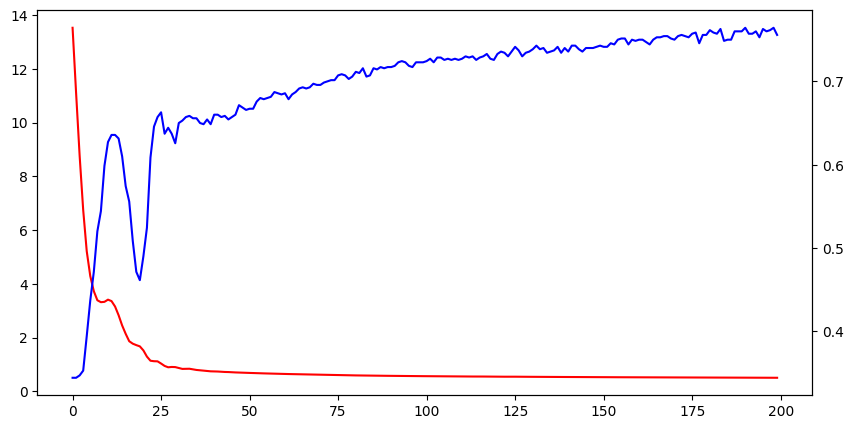

In [12]:
# 학습과정 표시 (학습데이터에 대한 loss와 accuracy)

fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'r')
acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history.get('binary_accuracy'), 'b')

In [13]:
# 모델 평가(X)

model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.5060 - binary_accuracy: 0.7600


[0.5060053467750549, 0.7599999904632568]

In [14]:
# 모델 평가(O)

model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6850 - binary_accuracy: 0.6471


[0.6849902868270874, 0.6470588445663452]

# 혼동행렬

- 테스트 데이터 셋의 실제값과 예측값으로 작성된 교차표

In [15]:
y_test[:5]

array([0., 1., 1., 0., 0.])

In [16]:
# 실제값 : y_test (68개)
# 예측값

y_hat = (model.predict(X_test) >= 0.5).astype(float)

3/3 [==============================] - 0s 2ms/step


In [17]:
TN = 0  # 0을 0으로 예측한 경우의 수 (T)
FP = 0  # 0을 1로 예측한 경우의 수 (F)
FN = 0  # 1을 0으로 예측한 경우의 수 (F)
TP = 0  # 1을 1로 예측한 경우의 수 (T)
print(y_test.shape, y_hat.shape)

for y, h in zip(y_test, y_hat.reshape(-1)) :
    if y == 0 and h == 0 :
        TN += 1
    elif y == 0 and h == 1 :
        FP += 1
    elif y == 1 and h == 0 :
        FN += 1
    else :
        TP += 1
print(TN, FP)
print(FN, TP)

(68,) (68, 1)
36 5
19 8


In [18]:
# 교차표

ctab = pd.crosstab(y_test,  # 실제값
                  y_hat.reshape(-1))  # 예측값
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab
pd.crosstab(y_test,  # 실제값
            y_hat.reshape(-1),  # 예측값
            rownames = ['실제값'],
            colnames = ['예측값']) 

예측값,0.0,1.0
실제값,,
0.0,36,5
1.0,19,8


In [19]:
# 혼동행렬

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,
                y_hat.reshape(-1))

array([[36,  5],
       [19,  8]], dtype=int64)

In [20]:
# accuracy

print('accuracy :', (TN + TP) / (TN + FP + FN + TP))
print('recall :', (TP) / (FN + TP))
print('precision :', (TP) / (FP + TP))

accuracy : 0.6470588235294118
recall : 0.2962962962962963
precision : 0.6153846153846154


## 6. 모델 사용

In [21]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [22]:
int(model.predict(np.array([[2, 122, 76, 27, 200, 35.9, 0.483, 26]])) >= 0.5)

1/1 [==============================] - 0s 29ms/step


0

In [23]:
(model.predict([[2, 122, 76, 27, 200, 35.9, 0.483, 26],
               [0, 122, 76, 27, 200, 35.9, 0.483, 26]])).astype(int)

1/1 [==============================] - 0s 43ms/step


array([[0],
       [0]])

# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋(600), 검증셋(100), 테스트셋(68)
2. 모델 생성(input8, output 2) : 출력층 softmax(출력합을 1)
    - model.summary() 파라미터 수와 메모리 확인
3. 모델 학습과정 설정 : loss = "categorical_crossentropy, metrics = ['accuracy']
4. 모델 학습 : 훈련셋과 검증셋
5. 모델 평가 : 그래프(hist.history), 평가(테스트셋), 교차표(테스트셋)
6. 모델 저장 및 사용 : predict결과에 argmax() [99.2, 0.8]

## 1. 데이터 셋 생성 및 전저리

In [24]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', encoding = 'utf-8', delimiter = ',')
dataset.shape

(768, 9)

In [25]:
# 훈련셋(600), 검증셋(100), 테스트셋(68)

X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [26]:
# 타겟변수의 원핫인코딩(분류분석)

print(y_train[:5])
print(utils.to_categorical(y_train[:5]))
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
y_train.shape, Y_train.shape, Y_val.shape, Y_test.shape

[1. 0. 1. 0. 1.]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


((600,), (600, 2), (100, 2), (68, 2))

## 2. 모델 생성(input8, target2)

- 과적합 줄이는 단계 추가 (dropout 추가)

In [27]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Input(shape = (8, )))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.2))  # 과적합을 해결
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                

## 3. 학습과정 설정

In [28]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'nadam',
             metrics = ['accuracy'])

## 4. 모델 학습

In [29]:
hist = model.fit(X_train, Y_train,
                epochs = 300,
                validation_data = (X_val, Y_val),
                verbose = 2)

Epoch 1/300
19/19 - 1s - loss: 3.4154 - accuracy: 0.5650 - val_loss: 0.7313 - val_accuracy: 0.6600 - 992ms/epoch - 52ms/step
Epoch 2/300
19/19 - 0s - loss: 1.4318 - accuracy: 0.5633 - val_loss: 0.8212 - val_accuracy: 0.6700 - 63ms/epoch - 3ms/step
Epoch 3/300
19/19 - 0s - loss: 1.2350 - accuracy: 0.6050 - val_loss: 0.7117 - val_accuracy: 0.6700 - 59ms/epoch - 3ms/step
Epoch 4/300
19/19 - 0s - loss: 1.0159 - accuracy: 0.5700 - val_loss: 0.6968 - val_accuracy: 0.6700 - 61ms/epoch - 3ms/step
Epoch 5/300
19/19 - 0s - loss: 0.9047 - accuracy: 0.5733 - val_loss: 0.6518 - val_accuracy: 0.6700 - 62ms/epoch - 3ms/step
Epoch 6/300
19/19 - 0s - loss: 0.8494 - accuracy: 0.5933 - val_loss: 0.6514 - val_accuracy: 0.6700 - 65ms/epoch - 3ms/step
Epoch 7/300
19/19 - 0s - loss: 0.7743 - accuracy: 0.6100 - val_loss: 0.6316 - val_accuracy: 0.6700 - 62ms/epoch - 3ms/step
Epoch 8/300
19/19 - 0s - loss: 0.7525 - accuracy: 0.6117 - val_loss: 0.6326 - val_accuracy: 0.6700 - 63ms/epoch - 3ms/step
Epoch 9/300
19

Epoch 68/300
19/19 - 0s - loss: 0.6204 - accuracy: 0.6567 - val_loss: 0.6124 - val_accuracy: 0.6700 - 74ms/epoch - 4ms/step
Epoch 69/300
19/19 - 0s - loss: 0.6514 - accuracy: 0.6533 - val_loss: 0.6163 - val_accuracy: 0.6700 - 68ms/epoch - 4ms/step
Epoch 70/300
19/19 - 0s - loss: 0.6340 - accuracy: 0.6517 - val_loss: 0.6119 - val_accuracy: 0.6700 - 58ms/epoch - 3ms/step
Epoch 71/300
19/19 - 0s - loss: 0.6337 - accuracy: 0.6567 - val_loss: 0.6125 - val_accuracy: 0.6700 - 57ms/epoch - 3ms/step
Epoch 72/300
19/19 - 0s - loss: 0.6325 - accuracy: 0.6533 - val_loss: 0.6142 - val_accuracy: 0.6700 - 60ms/epoch - 3ms/step
Epoch 73/300
19/19 - 0s - loss: 0.6335 - accuracy: 0.6550 - val_loss: 0.6117 - val_accuracy: 0.6700 - 58ms/epoch - 3ms/step
Epoch 74/300
19/19 - 0s - loss: 0.6324 - accuracy: 0.6517 - val_loss: 0.6146 - val_accuracy: 0.6700 - 57ms/epoch - 3ms/step
Epoch 75/300
19/19 - 0s - loss: 0.6296 - accuracy: 0.6583 - val_loss: 0.6143 - val_accuracy: 0.6700 - 61ms/epoch - 3ms/step
Epoch 76

Epoch 134/300
19/19 - 0s - loss: 0.5945 - accuracy: 0.6767 - val_loss: 0.5970 - val_accuracy: 0.6900 - 57ms/epoch - 3ms/step
Epoch 135/300
19/19 - 0s - loss: 0.6069 - accuracy: 0.6733 - val_loss: 0.5905 - val_accuracy: 0.7000 - 62ms/epoch - 3ms/step
Epoch 136/300
19/19 - 0s - loss: 0.5955 - accuracy: 0.6583 - val_loss: 0.5927 - val_accuracy: 0.7100 - 59ms/epoch - 3ms/step
Epoch 137/300
19/19 - 0s - loss: 0.6001 - accuracy: 0.6817 - val_loss: 0.5915 - val_accuracy: 0.7000 - 57ms/epoch - 3ms/step
Epoch 138/300
19/19 - 0s - loss: 0.5878 - accuracy: 0.6850 - val_loss: 0.5951 - val_accuracy: 0.6900 - 58ms/epoch - 3ms/step
Epoch 139/300
19/19 - 0s - loss: 0.5984 - accuracy: 0.6767 - val_loss: 0.5872 - val_accuracy: 0.6900 - 62ms/epoch - 3ms/step
Epoch 140/300
19/19 - 0s - loss: 0.5945 - accuracy: 0.6833 - val_loss: 0.5873 - val_accuracy: 0.6800 - 61ms/epoch - 3ms/step
Epoch 141/300
19/19 - 0s - loss: 0.5919 - accuracy: 0.6667 - val_loss: 0.5901 - val_accuracy: 0.7000 - 60ms/epoch - 3ms/step


Epoch 200/300
19/19 - 0s - loss: 0.5660 - accuracy: 0.7067 - val_loss: 0.5566 - val_accuracy: 0.7300 - 60ms/epoch - 3ms/step
Epoch 201/300
19/19 - 0s - loss: 0.5669 - accuracy: 0.7317 - val_loss: 0.5553 - val_accuracy: 0.7300 - 60ms/epoch - 3ms/step
Epoch 202/300
19/19 - 0s - loss: 0.5792 - accuracy: 0.6850 - val_loss: 0.5552 - val_accuracy: 0.7100 - 60ms/epoch - 3ms/step
Epoch 203/300
19/19 - 0s - loss: 0.5544 - accuracy: 0.7017 - val_loss: 0.5545 - val_accuracy: 0.7300 - 62ms/epoch - 3ms/step
Epoch 204/300
19/19 - 0s - loss: 0.5691 - accuracy: 0.7150 - val_loss: 0.5604 - val_accuracy: 0.7200 - 60ms/epoch - 3ms/step
Epoch 205/300
19/19 - 0s - loss: 0.5771 - accuracy: 0.7017 - val_loss: 0.5633 - val_accuracy: 0.7100 - 59ms/epoch - 3ms/step
Epoch 206/300
19/19 - 0s - loss: 0.5623 - accuracy: 0.7150 - val_loss: 0.5659 - val_accuracy: 0.6900 - 61ms/epoch - 3ms/step
Epoch 207/300
19/19 - 0s - loss: 0.5585 - accuracy: 0.7200 - val_loss: 0.5637 - val_accuracy: 0.7100 - 58ms/epoch - 3ms/step


Epoch 266/300
19/19 - 0s - loss: 0.5437 - accuracy: 0.7250 - val_loss: 0.5562 - val_accuracy: 0.7300 - 58ms/epoch - 3ms/step
Epoch 267/300
19/19 - 0s - loss: 0.5418 - accuracy: 0.7033 - val_loss: 0.5532 - val_accuracy: 0.7300 - 58ms/epoch - 3ms/step
Epoch 268/300
19/19 - 0s - loss: 0.5462 - accuracy: 0.7283 - val_loss: 0.5438 - val_accuracy: 0.7600 - 71ms/epoch - 4ms/step
Epoch 269/300
19/19 - 0s - loss: 0.5445 - accuracy: 0.7200 - val_loss: 0.5379 - val_accuracy: 0.7400 - 61ms/epoch - 3ms/step
Epoch 270/300
19/19 - 0s - loss: 0.5338 - accuracy: 0.7233 - val_loss: 0.5415 - val_accuracy: 0.7400 - 59ms/epoch - 3ms/step
Epoch 271/300
19/19 - 0s - loss: 0.5466 - accuracy: 0.7183 - val_loss: 0.5499 - val_accuracy: 0.7200 - 63ms/epoch - 3ms/step
Epoch 272/300
19/19 - 0s - loss: 0.5376 - accuracy: 0.7250 - val_loss: 0.5441 - val_accuracy: 0.7300 - 60ms/epoch - 3ms/step
Epoch 273/300
19/19 - 0s - loss: 0.5411 - accuracy: 0.7333 - val_loss: 0.5561 - val_accuracy: 0.7000 - 63ms/epoch - 3ms/step


## 5. 학습과정 살펴보기

In [30]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

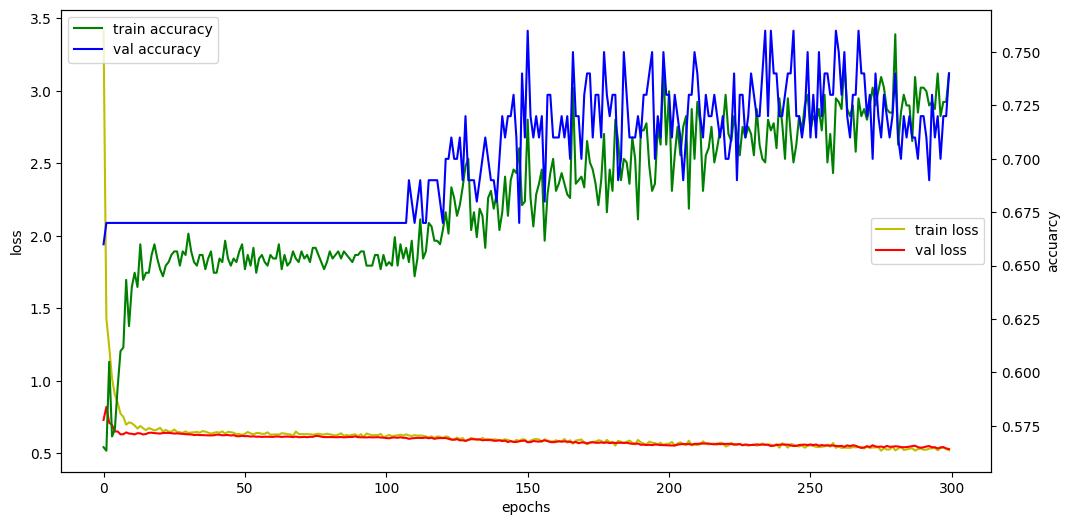

In [31]:
fig, loss_ax = plt.subplots(figsize = (12, 6))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuarcy')
loss_ax.legend(loc = 'center right')
acc_ax.legend()
plt.show()

## 6. 모델 평가 & 교차표

In [32]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print(f'loss : {loss}, 정확도 : {accuracy}')

loss : 0.6223486065864563, 정확도 : 0.6323529481887817


In [33]:
# 교차표

Y_test.argmax(axis = 1)  # 실제값 y_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [34]:
y_hat = model.predict(X_test).argmax(axis = 1)
y_hat

3/3 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [35]:
pd.crosstab(y_test, y_hat, rownames = ['실제값'], colnames = ['예측값'])

예측값,0,1
실제값,,
0.0,39,2
1.0,23,4


In [36]:
confusion_matrix(y_test, y_hat)

array([[39,  2],
       [23,  4]], dtype=int64)

## 7. 모델 저장 및 사용

In [37]:
from tensorflow.keras.models import save_model, load_model

# model.save('model/06_pima.h5')
save_model(model, 'model/06_pima.h5')

In [38]:
model2 = load_model('model/06_pima.h5')

In [39]:
pred = model2.predict([[2, 122, 76, 27, 200, 35.9, 0.483, 26],
                       [6, 125, 78, 31, 0, 27.6, 0.565, 49]])
pred.argmax(axis = 1)

1/1 [==============================] - 0s 81ms/step


array([0, 0], dtype=int64)

In [40]:
np.argmax(pred, axis = 1)

array([0, 0], dtype=int64)